<a href="https://colab.research.google.com/github/KY-39/platform_udt3/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7_%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D0%B8_%D0%BF%D0%BE%D0%B6%D0%B0%D1%80%D0%BE%D0%B2_%D0%B2_%D0%9F%D0%BE%D1%80%D1%82%D1%83%D0%B3%D0%B0%D0%BB%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ООО "Университет Цифровых Технологий платформа 3"

###Подключаем необходимые модули.

In [1]:
from tensorflow.keras.models import Sequential, load_model # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization # Подключаем класс Dense - полносвязный слой, и Flatten - данные выстраиваем в линию, одномерные
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical

import tensorflow as tf # импортируем tensorflow

# sklearn - популярная библиотека для машинного обучения
# train_test_split - функция разделения на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # для построения матрицы ошибок
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # для нормализации данных

import numpy as np # Подключаем библиотеку numpy
import pandas as pd # Библиотека pandas

import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений

#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [2]:
#запускаем - подключаем Google Drive - будем скачивать с него, т.к. намного быстрее
#после запуска переходим по ссылке, которая появится, для идентификации
#копируем оттуда код authorization code и вставляем здесь в окошко
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Задача регрессии, цель которой состоит в том, чтобы спрогнозировать площадь выгоревших лесных пожаров в северо-восточном регионе Португалии с использованием метеорологических и других данных.

Загрузите из дата сета базы метеорологических и других данных - тренировочную и валидационную, а также базу для тестирования. Подайте дата сет в нейронную сеть, постаравшись добиться максимальной точности распознавания. Для улучшения обучения можно использовать также дополнительные методы, не рассмотренные в занятиях, слои, функции активации, менять параметры оптимизатора Adam и прочие гипер параметры. Результаты рекомендуется заносить в таблицу для себя, чтобы можно было потом воспроизвести лучший вариант. Предсказание Вашей сети необходимо отправить в виде специального файла с расширением csv, чтобы войти в рейтинговую таблицу соревнования. Ответ можно улучшить и подавать результат несколько раз.

Содержание датасета: Набор данных содержится в 3 массивах (train, test, val) и содержит метки размера площади пожара. Меток нет только в тестовом наборе, их нужно спрогнозировать нейронной сетью и отослать на соревнование в виде файла csv. Существует 517 наборов данных, из них 439 обучающая выборка и 78 тестовая.

Наборы данных уже нормализованы и готовы к подачи, для обучения в нейронной сети.

### Наборы данных до нормализации выглядел следующим образом:

1. Пространственная координата оси X - x на карте парка Монтесиньо: от 1 до 9
2. Пространственная координата оси Y - y на карте парка Монтесиньо: от 2 до 9
3. месяц - месяц года: с января по декабрь
4. день - день недели: от "пн" до "вс"
5. Индекс FFMC - FFMC из системы FWI: от 18,7 до 96,20
6. Индекс DMC - DMC из системы FWI: от 1,1 до 291,3
7. Индекс DC - DC от системы FWI: от 7,9 до 860,6
8. Индекс ISI - ISI от системы FWI: от 0.0 до 56.10
9. temp - температура в градусах Цельсия: от 2,2 до 33,30
10. RH - относительная влажность воздуха в %: от 15,0 до 100
11. ветер - скорость ветра в км/ч: от 0,40 до 9,40
12. дождь - наружный дождь в мм/м2 : от 0,0 до 6,4
13. площадь - сожженная площадь леса (в га): от 0,00 до 1090,84
(эта выходная переменная очень смещена в сторону 0.0, поэтому имеет смысл моделировать с помощью логарифмического преобразования).



Ссылка на задание: https://www.kaggle.com/t/e594f270a7554fe5b3ce37e557d9d883



### Анализ и обработка данных

In [3]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=0be685dea0063cd37c932ceab10726b59c3944508613ca895797335ef529b158
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [4]:
%ls

drive/  sample_data/


In [5]:
%cd /content/drive/MyDrive/datasets/kaggle/

/content/drive/MyDrive/datasets/kaggle


In [6]:
!mkdir /root/.kaggle

In [7]:
!cp './kaggle.json' '/root/.kaggle/kaggle.json' # установка ключей

In [8]:
# !cp '/content/drive/MyDrive/datasets/kaggle/kaggle.json' '/root/.kaggle/kaggle.json' # альтернативный вариант

In [9]:
!kaggle competitions download -c udt-3-regression

  0% 0.00/19.0k [00:00<?, ?B/s]
100% 19.0k/19.0k [00:00<00:00, 3.37MB/s]


In [11]:
!ls

kaggle.json  udt-3-regression.zip


In [12]:
import zipfile
zipfile.ZipFile('udt-3-regression.zip', 'r').extractall()
!ls

kaggle.json		    udt-3-regression.zip  x_train.npy  yTrainScaled.bin
sampleSubmissionForest.csv  x_test.npy		  y_train.npy


In [13]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')

### Создаем нейронную сеть с полученными данными.

In [14]:
# Обучаем модель полученными данными
def createModel(inputmy):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(inputmy,)))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(lr=1e-3), loss='mse', metrics=['accuracy'])
    # model.compile(optimizer=Adam(lr=1e-3), loss='logcosh', metrics=['accuracy'])
    return model


In [15]:
# Создаём пустую сеть при помощи функции createModel() с заданным аргументом
model = createModel(x_train.shape[1])
# Обучаем сеть
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, # Количество эпох
                    batch_size=50, # Размер батча
                    validation_split=0.2, 
                    verbose=1) # Выводить процесс обучения на каждой эпохе


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 5s 88ms/step - loss: 0.2685 - accuracy: 0.3704 - val_loss: 0.0431 - val_accuracy: 0.4432
Epoch 2/30
8/8 [==============================] - 0s 9ms/step - loss: 0.2876 - accuracy: 0.3875 - val_loss: 0.0538 - val_accuracy: 0.4432
Epoch 3/30
8/8 [==============================] - 0s 9ms/step - loss: 0.2080 - accuracy: 0.3960 - val_loss: 0.0428 - val_accuracy: 0.4432
Epoch 4/30
8/8 [==============================] - 0s 11ms/step - loss: 0.2144 - accuracy: 0.3618 - val_loss: 0.0448 - val_accuracy: 0.4432
Epoch 5/30
8/8 [==============================] - 0s 8ms/step - loss: 0.1505 - accuracy: 0.4245 - val_loss: 0.0422 - val_accuracy: 0.4432
Epoch 6/30
8/8 [==============================] - 0s 9ms/step - loss: 0.1191 - accuracy: 0.4416 - val_loss: 0.0468 - val_accuracy: 0.4432
Epoch 7/30
8/8 [==============================] - 0s 9ms/step - loss: 0.1363 - accuracy: 0.4103 - val_loss: 0.0462 - val_accuracy: 0.4432
Epoch 8/30
8/8 [===========================

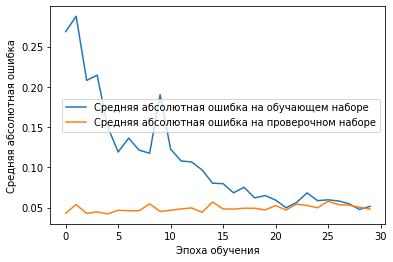

In [16]:
# графическое отображение работы сети
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

### Проверим результат работы на тестовых данных

In [17]:
prediction = model.predict(x_test).flatten() # сделаем предсказание нашей моделью тестовой выборки
# зададим ответ в нужном формате для соревнования в kaggle
submission = pd.DataFrame({"Id":range(1,len(prediction)+1),"Label":prediction})

In [18]:
submission.head()

,Id,Label
0,1,0.152674
1,2,0.157008
2,3,0.169043
3,4,0.103723
4,5,0.101498


In [19]:
# запишем ответ в файл
submission = submission.to_csv('./submission01_forest_file.csv',index=False,header=True)

In [20]:
# передадим файл для участия в соревновании на kaggle
!kaggle competitions submit -c udt-3-regression -f submission01_forest_file.csv -m "Message"

100% 1.09k/1.09k [00:01<00:00, 754B/s]
Successfully submitted to Университет Цифровых Технологий платформа 3

###Переходим по ссылке, чтобы увидеть таблицу лидеров.

https://www.kaggle.com/c/udt-3-regression/leaderboard